##### Customer lifetime, often referred to as Customer Lifetime Value (CLV or CLTV), is a crucial metric in marketing and business that represents the predicted net profit a company can expect to earn from a customer over the entire duration of their relationship. 
#### The given data includes information about the customer’s channel, cost of acquisition, conversion rate, and revenue generated. Our task is to analyze the CLTV of customers across different channels and identify the most profitable channels for the business.


 Import Libraries

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the Data

In [6]:
data= pd.read_csv("customer_acquisition_data.csv")


In [7]:
data.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [24]:
data.isnull().sum()

customer_id        0
channel            0
cost               0
conversion_rate    0
revenue            0
dtype: int64

In [8]:
data.describe()

,customer_id,cost,conversion_rate,revenue
count,800.0000,800.000000,800.000000,800.000000
mean,400.5000,13.148052,0.086305,2769.151250
std,231.0844,9.922337,0.059611,1259.543706
min,1.0000,5.246263,0.016341,500.000000
25%,200.7500,5.246263,0.043822,1694.000000
50%,400.5000,8.320327,0.043822,2764.000000
75%,600.2500,9.546326,0.123145,3824.250000
max,800.0000,30.450327,0.167592,4998.000000


Explaining some columns:


Cost of Acquisition:
This column indicates the cost incurred by the business to acquire each customer from a specific channel. It typically includes expenses related to marketing, advertising, promotions, and any other costs associated with customer acquisition efforts for that channel.

Conversion Rate:
The conversion rate column represents the percentage of visitors or leads from a specific channel who eventually became paying customers. It's a measure of the effectiveness of each channel in turning potential customers into actual buyers

Let’s start by visualizing the distribution of acquisition cost and revenue generated by the customer using histograms

Text(0.5, 1.0, 'Distribution of Acquisition Cost')

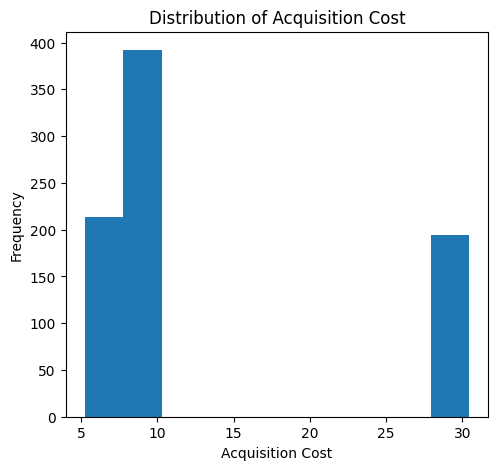

In [9]:
# Create histograms for acquisition cost and revenue
plt.figure(figsize=(12, 5))

# Histogram for Acquisition Cost
plt.subplot(1, 2, 1)
plt.hist(data['cost'], bins=10)
plt.xlabel('Acquisition Cost')
plt.ylabel('Frequency')
plt.title('Distribution of Acquisition Cost')

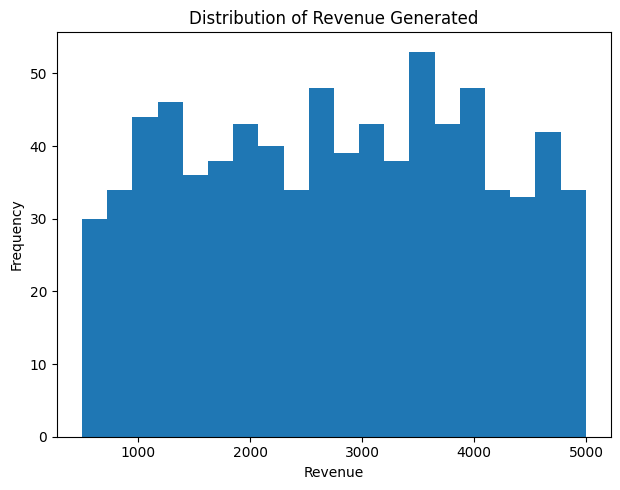

In [10]:
# create histogram for revenue)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(data["revenue"], bins=20)
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.title('Distribution of Revenue Generated')
plt.tight_layout()



Now let’s compare the cost of acquisition across different channels and identify the most and least profitable channels:

([0, 1, 2, 3],
 [Text(0, 0, 'email marketing'),
  Text(1, 0, 'paid advertising'),
  Text(2, 0, 'referral'),
  Text(3, 0, 'social media')])

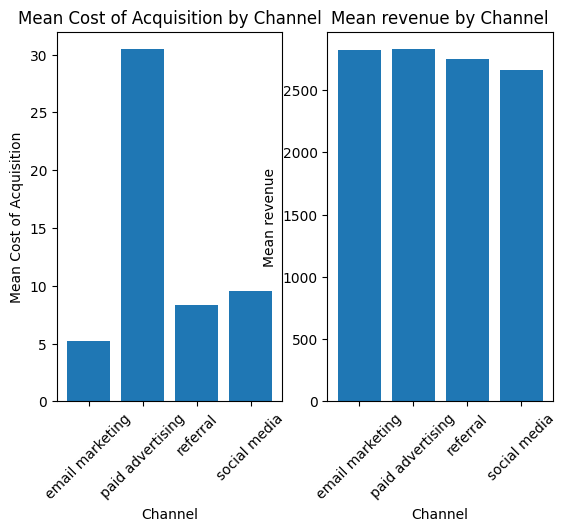

In [19]:
# Group data by channel and calculate the total cost for each channel
cost_by_channel = data.groupby("channel")["cost"].mean().reset_index()
plt.subplot(1, 2, 1)
plt.bar(cost_by_channel["channel"],cost_by_channel["cost"])
plt.xlabel('Channel')
plt.ylabel('Mean Cost of Acquisition')
plt.title('Mean Cost of Acquisition by Channel')
plt.xticks(rotation=45)
# Group data by channel and calculate the total cost for each channel
revenue_by_channel = data.groupby("channel")["revenue"].mean().reset_index()
plt.subplot(1, 2, 2)
plt.bar(revenue_by_channel["channel"],revenue_by_channel["revenue"])
plt.xlabel('Channel')
plt.ylabel('Mean revenue')
plt.title('Mean revenue by Channel')
plt.xticks(rotation=45)

 from these charts, we can draw some insights: 
 'Paid advertising' has the highest acquisition cost but generates revenue comparable to 'email marketing.' While it has a higher cost, it may still be profitable if its conversion rate is higher than the other channels.

'Email marketing' has the lowest acquisition cost and generates revenue on par with 'paid advertising,' making it potentially the most cost-effective channel in terms of ROI.

 To gain more confirmation of the insights regarding profitability, let's also consider the conversion rate for each channel alongside the profit margin analysis.

([0, 1, 2, 3],
 [Text(0, 0, 'email marketing'),
  Text(1, 0, 'paid advertising'),
  Text(2, 0, 'referral'),
  Text(3, 0, 'social media')])

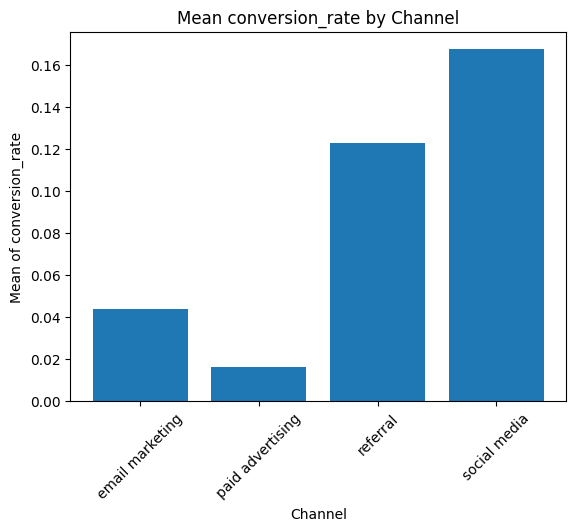

In [25]:
conversion_rate_by_channel = data.groupby("channel")["conversion_rate"].mean().reset_index()
plt.bar(conversion_rate_by_channel["channel"],conversion_rate_by_channel["conversion_rate"])
plt.xlabel('Channel')
plt.ylabel('Mean of conversion_rate')
plt.title('Mean conversion_rate by Channel')
plt.xticks(rotation=45)

let’s calculate the return on investment (ROI) for each channel, and ensure if Email marketing is the most cost-effective channel in terms of ROI or not.


([0, 1, 2, 3],
 [Text(0, 0, 'email marketing'),
  Text(1, 0, 'paid advertising'),
  Text(2, 0, 'referral'),
  Text(3, 0, 'social media')])

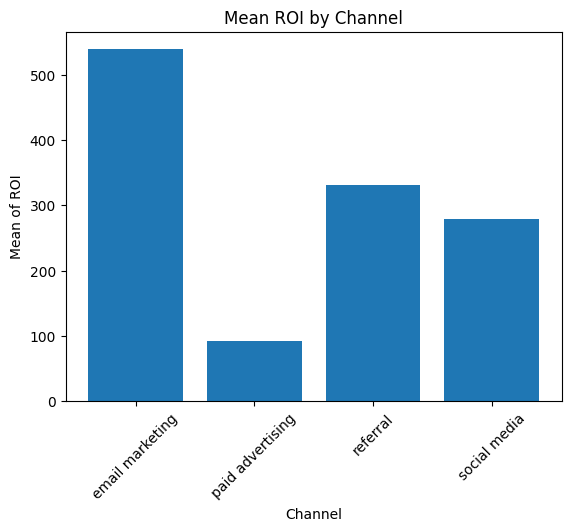

In [29]:
data['ROI']=data['revenue'] / data['cost']
roi_by_channel=data.groupby('channel')['ROI'].mean().reset_index()
plt.bar(roi_by_channel['channel'], roi_by_channel['ROI'] )
plt.xlabel('Channel')
plt.ylabel('Mean of ROI')
plt.title('Mean ROI by Channel')
plt.xticks(rotation=45)

 Email marketing stands out as the most profitable channel with an ROI.
 To analyze the Customer Lifetime Value (CLTV) of customers across different channels, need to calculate the average CLTV for each channel. The Customer Lifetime Value (CLTV) is typically calculated using the following formula:
 
   CLTV = (revenue – cost) * conversion_rate / cost

([0, 1, 2, 3],
 [Text(0, 0, 'email marketing'),
  Text(1, 0, 'paid advertising'),
  Text(2, 0, 'referral'),
  Text(3, 0, 'social media')])

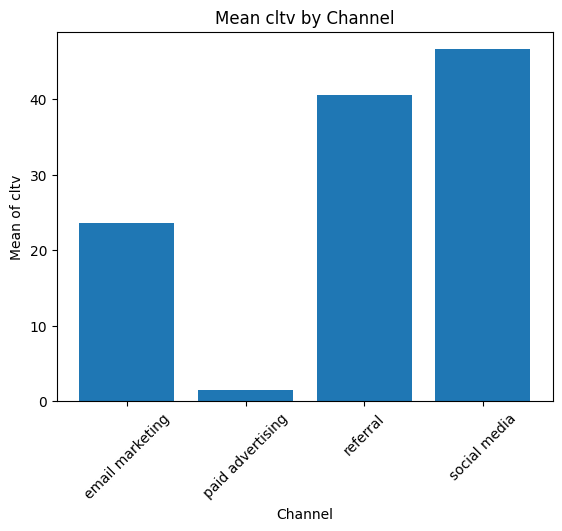

In [35]:
data['cltv']=(data['revenue'] - data['cost']) * data['conversion_rate'] / data['cost']
channel_cltv = data.groupby('channel')['cltv'].mean().reset_index()
plt.bar(channel_cltv['channel'], channel_cltv['cltv'] )
plt.xlabel('Channel')
plt.ylabel('Mean of cltv')
plt.title('Mean cltv by Channel')
plt.xticks(rotation=45)


Social Media and Referral marketing channels have the highest CLTV, indicating that customers acquired through these channels tend to generate the most revenue over their lifetime.

Summary:
the analysis identified Email Marketing, Referral, and Social Media as strong performers in terms of profitability, each with its unique strengths. Paid Advertising, while having lower ROI and conversion rates, may still contribute to overall profitability due to other factors. These insights can guide resource allocation and marketing strategies to maximize the business's overall profitability.